# torchvision : 유명한 데이터 셋, 모델 아키텍처 등을 불러올 수 있음

In [1]:
import torch
# 여러 데이터를 불러올 수 있는 torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [ ]:
# cuda란 무엇인가 : NVIDIA 에서 개발한 GPU 개발 툴
# 사용하는 이유 : 많은 양의 연산을 동시에 처리하는 것이 목표
# GPU와 CPU 비교 예시 : https://kaen2891.tistory.com/20

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [7]:
training_epochs = 15
batch_size = 100 # 6만장 중에서 몇 장 씩 불러올 것인가

In [9]:
### 데이터를 불러오는 과정

In [8]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

# root : mnist 데이터가 어디에 있는지
# train=True : train set
# transform : 어떤 트랜스폼을 적용해서 불러올 것인지
# download : mnist 데이터가 없다면 다운을 받겠다!

In [10]:
# data loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                         batch_size=batch_size,
                                         shuffle=True,
                                         drop_last=True)

In [12]:
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [13]:
# cost/loss & optimizer 
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [14]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        X = X.view(-1, 28*28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535390794
Epoch: 0002 cost = 0.359177381
Epoch: 0003 cost = 0.331118673
Epoch: 0004 cost = 0.316633701
Epoch: 0005 cost = 0.307087958
Epoch: 0006 cost = 0.300068080
Epoch: 0007 cost = 0.295046121
Epoch: 0008 cost = 0.290930480
Epoch: 0009 cost = 0.287385255
Epoch: 0010 cost = 0.284603179
Epoch: 0011 cost = 0.281893313
Epoch: 0012 cost = 0.279760391
Epoch: 0013 cost = 0.277736664
Epoch: 0014 cost = 0.276140094
Epoch: 0015 cost = 0.274554461
Learning finished


Accuracy: 0.8914999961853027
Label:  8
Prediction:  3


/Users/gyuyeonjo/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/gyuyeonjo/opt/anaconda3/lib/python3.9/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


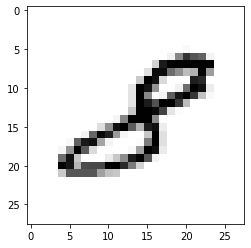

In [15]:
# Test the model using test sets
with torch.no_grad(): # gradient 계산을 하지 않을 채로ㅠ
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

# Visualization

In [16]:
import matplotlib.pyplot as plt
import random

In [17]:
r = random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

In [18]:
print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  5
Prediction:  3


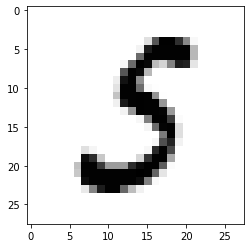

In [20]:
plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
plt.show()